In [3]:
#inputs

input_data = {
    "Investment Cost": {"value": 1021, "unit": "$/kW"},
    "Expected plant life": {"value": 30, "unit": "years"},
    "Heat rate at rated output": {"value": 9419, "unit": "Btu/kWh"},
    "Expected fuel cost": {"value": 1.25, "unit": "$/Mbtu"},
    "Capacity": {"value": 500, "unit": "MW"}
}


In [5]:
# Assumptions
uf=0.8 # utilisation factor (%)
elec_price=32 #energy sell price ($/MWh)

In [9]:
# calculations 

investment_cost = input_data['Investment Cost']['value']*input_data['Capacity']['value']*1000  #1000 is required to convert MW to kW
print(f"Investment cost:\t{investment_cost}")

peroid_of_one_year= 24*365
production_power = input_data['Capacity']['value'] * uf * peroid_of_one_year
print(f"Production:\t{production_power}")

production_cost = production_power * input_data['Heat rate at rated output']['value'] * input_data['Expected fuel cost']['value'] * 0.001 #0.001 is required due to $/Mbtu and Btu/kWh
print(f"Production Cost:\t{production_cost}")

revenue = production_power * elec_price 

print(f"Revenue:\t{revenue}")



Investment cost:	510500000
Production:	3504000.0
Production Cost:	41255220.0
Revenue:	112128000.0


In [10]:
# Create a DataFrame
import pandas as pd 
df = pd.DataFrame(columns=["Year", "Investment", "Production", "Production Cost", "Revenue", "Net Cash Flow"])

# Fill the DataFrame
for year in range(input_data['Expected plant life']['value'] + 1):
    if year == 0:
        df.loc[year] = [year, investment_cost, 0, 0, 0, -investment_cost]
    else:
        df.loc[year] = [year, 0, production_power, production_cost, revenue, revenue - production_cost]

In [12]:
df.head()

,Year,Investment,Production,Production Cost,Revenue,Net Cash Flow
0,0.0,510500000.0,0.0,0.0,0.0,-510500000.0
1,1.0,0.0,3504000.0,41255220.0,112128000.0,70872780.0
2,2.0,0.0,3504000.0,41255220.0,112128000.0,70872780.0
3,3.0,0.0,3504000.0,41255220.0,112128000.0,70872780.0
4,4.0,0.0,3504000.0,41255220.0,112128000.0,70872780.0


In [17]:
import numpy_financial as npf

# Convert the "Net Cash Flow" column to a list
cash_flows = df["Net Cash Flow"].tolist()

# Calculate the IRR
irr = npf.irr(cash_flows)

# Convert IRR to percentage
irr_percent = irr * 100

print(f"The Internal Rate of Return (IRR) is: {irr_percent}%")


The Internal Rate of Return (IRR) is: 13.578504268341728%


### Sensitivity analysis 

C:\Users\saeed.misaghian\AppData\Local\Temp\ipykernel_21108\1138836154.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"elec_price": elec_price, "uf": uf, "IRR": irr}, ignore_index=True)
C:\Users\saeed.misaghian\AppData\Local\Temp\ipykernel_21108\1138836154.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"elec_price": elec_price, "uf": uf, "IRR": irr}, ignore_index=True)
C:\Users\saeed.misaghian\AppData\Local\Temp\ipykernel_21108\1138836154.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"elec_price": elec_price, "uf": uf, "IRR": irr}, ignore_index=True)
C:\Users\saeed.misaghian\AppData\Local\Temp\ipykernel_21108\1138836154.py:47: FutureWarning: The frame.append

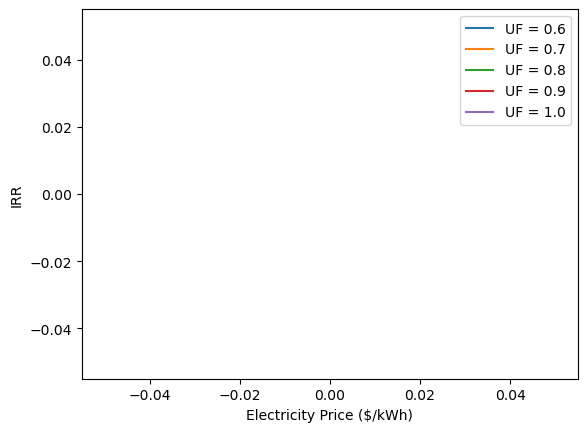

In [1]:
import numpy_financial as npf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the input data
input_data = {
    "Investment Cost": {"value": 1021, "unit": "$/kW"},
    "Expected plant life": {"value": 30, "unit": "years"},
    "Heat rate at rated output": {"value": 9419, "unit": "Btu/kWh"},
    "Expected fuel cost": {"value": 1.25, "unit": "$/Mbtu"},
    "Capacity": {"value": 500, "unit": "MW"}
}


# Define the range of electricity prices and utilization factors
elec_prices = np.linspace(0.05, 0.2, 100)  # replace with your range of electricity prices
ufs = [0.6, 0.7, 0.8, 0.9, 1.0]  # replace with your range of utilization factors

# Calculate the period of one year
period_of_one_year = 24 * 365

# Create a DataFrame to store the results
df = pd.DataFrame(columns=["elec_price", "uf", "IRR"])

# Calculate the IRR for each combination of electricity price and utilization factor
for elec_price in elec_prices:
    for uf in ufs:
        # Calculate the investment cost
        investment_cost = input_data['Investment Cost']['value'] * input_data['Capacity']['value'] * 1000  # 1000 is required to convert MW to kW

        # Calculate the production power
        production_power = input_data['Capacity']['value'] * uf * period_of_one_year

        # Calculate the production cost
        production_cost = production_power * input_data['Heat rate at rated output']['value'] * input_data['Expected fuel cost']['value'] * 0.001  # 0.001 is required due to $/Mbtu and Btu/kWh

        # Calculate the revenue
        revenue = production_power * elec_price

        # Create a list of net cash flows
        cash_flows = [-investment_cost] + [revenue - production_cost] * input_data['Expected plant life']['value']

        # Calculate the IRR
        irr = npf.irr(cash_flows)

        # Add the results to the DataFrame
        df = df.append({"elec_price": elec_price, "uf": uf, "IRR": irr}, ignore_index=True)

# Plot the IRR for each utilization factor
for uf in ufs:
    df_uf = df[df["uf"] == uf]
    plt.plot(df_uf["elec_price"], df_uf["IRR"], label=f"UF = {uf}")

plt.xlabel("Electricity Price ($/kWh)")
plt.ylabel("IRR")
plt.legend()
plt.show()


In [2]:
df_uf

,elec_price,uf,IRR
4,0.050000,1.0,NaN
9,0.051515,1.0,NaN
14,0.053030,1.0,NaN
19,0.054545,1.0,NaN
24,0.056061,1.0,NaN
...,...,...,...
479,0.193939,1.0,NaN
484,0.195455,1.0,NaN
489,0.196970,1.0,NaN
494,0.198485,1.0,NaN
